# Diabetes Example

## Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, KFold

## Data

In [3]:
from sklearn import datasets
X, y = datasets.load_diabetes(return_X_y=True)

## Lasso Grid Search

In [4]:
p = make_pipeline(
    StandardScaler(),
    Lasso()
)

gs = GridSearchCV(
  p,
  param_grid = {"lasso__alpha": np.logspace(-4, 1, 100)},
  scoring = 'neg_root_mean_squared_error',
  cv = KFold(10, shuffle=True, random_state=12345)
).fit(
  X, y
)

In [5]:
gs.best_params_

{'lasso__alpha': 0.08497534359086438}

In [6]:
gs.best_index_

58

In [7]:
gs.best_score_

-54.458667586675915

In [8]:
gs.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.08497534359086438))])

## Uncertainty

In [9]:
alpha = np.array(gs.cv_results_["param_lasso__alpha"], dtype="float64")
score = -gs.cv_results_["mean_test_score"]
score_std = gs.cv_results_["std_test_score"]
n_folds = gs.cv.get_n_splits()

In [10]:
alpha

array([1.00000000e-04, 1.12332403e-04, 1.26185688e-04, 1.41747416e-04,
       1.59228279e-04, 1.78864953e-04, 2.00923300e-04, 2.25701972e-04,
       2.53536449e-04, 2.84803587e-04, 3.19926714e-04, 3.59381366e-04,
       4.03701726e-04, 4.53487851e-04, 5.09413801e-04, 5.72236766e-04,
       6.42807312e-04, 7.22080902e-04, 8.11130831e-04, 9.11162756e-04,
       1.02353102e-03, 1.14975700e-03, 1.29154967e-03, 1.45082878e-03,
       1.62975083e-03, 1.83073828e-03, 2.05651231e-03, 2.31012970e-03,
       2.59502421e-03, 2.91505306e-03, 3.27454916e-03, 3.67837977e-03,
       4.13201240e-03, 4.64158883e-03, 5.21400829e-03, 5.85702082e-03,
       6.57933225e-03, 7.39072203e-03, 8.30217568e-03, 9.32603347e-03,
       1.04761575e-02, 1.17681195e-02, 1.32194115e-02, 1.48496826e-02,
       1.66810054e-02, 1.87381742e-02, 2.10490414e-02, 2.36448941e-02,
       2.65608778e-02, 2.98364724e-02, 3.35160265e-02, 3.76493581e-02,
       4.22924287e-02, 4.75081016e-02, 5.33669923e-02, 5.99484250e-02,
      

In [11]:
score_std

array([6.90286341, 6.90286532, 6.90286746, 6.90286986, 6.90287257,
       6.90287559, 6.902879  , 6.90288282, 6.90288713, 6.90289197,
       6.90289738, 6.90290349, 6.90291031, 6.90291803, 6.90292665,
       6.90293638, 6.90294733, 6.90295956, 6.90297334, 6.90298882,
       6.90300623, 6.90302578, 6.90304784, 6.90307256, 6.90310027,
       6.90313162, 6.90316661, 6.90320625, 6.90325061, 6.90330045,
       6.90335686, 6.90342006, 6.90349116, 6.9035712 , 6.90366164,
       6.90376299, 6.9038772 , 6.90400656, 6.90415224, 6.9043162 ,
       6.90450149, 6.90471058, 6.9049937 , 6.90590478, 6.9069327 ,
       6.90809194, 6.90940154, 6.9104053 , 6.91138242, 6.91249077,
       6.91375145, 6.91518269, 6.91676688, 6.91833753, 6.91903606,
       6.91981767, 6.92066711, 6.92183298, 6.92319433, 6.92432526,
       6.92581139, 6.92844518, 6.93146534, 6.93650874, 6.94220506,
       6.94793425, 6.95382264, 6.96366309, 6.9708448 , 6.97798459,
       6.97652581, 6.96657023, 6.9554935 , 6.9430156 , 6.92712

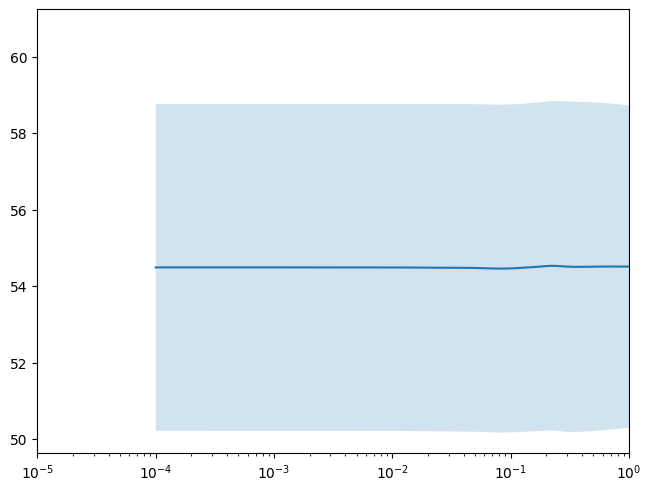

In [12]:
plt.figure(layout="constrained")

ax = sns.lineplot(x=alpha, y=score)
ax.set_xscale("log")

plt.fill_between(
  x = alpha,
  y1 = score + 1.96*score_std / np.sqrt(n_folds),
  y2 = score - 1.96*score_std / np.sqrt(n_folds),
  alpha = 0.2
)

ax.set_xlim(1e-5, 1)
#ax.set_ylim(54.4, 54.6)

plt.show()

## Traceplot

In [13]:
alpha = np.logspace(-4, 2, 100)
betas = []

for a in alpha:
    p = p.set_params(lasso__alpha = a)
    p = p.fit(X, y)
    
    betas.append(p.named_steps["lasso"].coef_)

res = pd.DataFrame(
  data = betas, columns = p[:-1].get_feature_names_out()
).assign(
  alpha = alpha  
)

res

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,alpha
0,-0.475891,-11.406659,24.726644,15.429187,-37.663674,22.663639,4.798374,8.419185,35.728576,3.216640,0.000100
1,-0.475857,-11.406628,24.726659,15.429154,-37.661236,22.661763,4.797211,8.418757,35.727697,3.216635,0.000115
2,-0.475818,-11.406592,24.726675,15.429117,-37.658434,22.659607,4.795874,8.418266,35.726686,3.216629,0.000132
3,-0.475772,-11.406551,24.726694,15.429074,-37.655211,22.657128,4.794337,8.417701,35.725524,3.216622,0.000152
4,-0.475720,-11.406503,24.726716,15.429024,-37.651507,22.654278,4.792570,8.417051,35.724188,3.216614,0.000175
...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,57.223677
96,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,65.793322
97,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,75.646333
98,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,86.974900


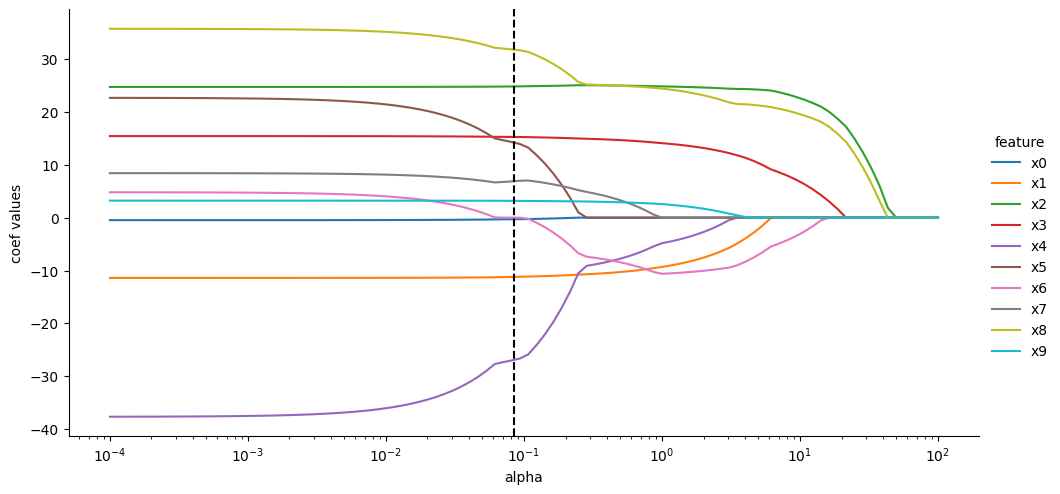

In [14]:
g = sns.relplot(
  data = res.melt(id_vars="alpha", value_name="coef values", var_name="feature"),
  x = "alpha", y = "coef values", hue = "feature",
  kind = "line", aspect=2
)
g.set(xscale="log")
plt.axvline(x = gs.best_params_["lasso__alpha"], color="k", linestyle="--")
plt.show()